# Data Drift in a Food Mart dataset

 In this project, we will use Jupyter to detect potential data drift in a dataset from Food Mart (CFM), a chain of convenience stores in the United States. The dataset contains information about CFM, including its history, number of stores, and operating model. 

  To gain insights into this dataset, we will perform exploratory data analysis and detect any potential data drift, which can indicate changes in the underlying data distribution over time.

  The dataset is from Kaggle: https://www.kaggle.com/datasets/ramjasmaurya/medias-cost-prediction-in-foodmart

## Exploratory Data Analysis and Data Pre-processing

In [87]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import IsolationForest

In [88]:
df_raw = pd.read_csv("media prediction and its cost.csv")


Since there is no date to divide our dataset,  we will split it in two using a midpoint.

In [89]:
# Calculate the midpoint index
midpoint = len(df_raw) // 2

# Split the dataset into two based on the midpoint index
ref_data = df_raw[:midpoint]
curr_data = df_raw[midpoint:]

### Unique Values

In [90]:
num_cols, cate_cols, pre_dum_cols = [], [], []
for c in ref_data.columns:
    uni_len = len(set(ref_data[c]))
    dtype = ref_data[c].dtypes

    if dtype == object:
        cate_cols.append(c)
    else: # dtype == float
        if uni_len == 2:
            pre_dum_cols.append(c)
        elif uni_len < 10:
            num_cols.append(c)
            print("Number of unique values: %d \t Datatype: %s \t Column name: %s" %(uni_len, dtype, c))
        else:
            num_cols.append(c)

num_cols, cate_cols, pre_dum_cols = [], [], []
for c in curr_data.columns:
    uni_len = len(set(curr_data[c]))
    dtype = curr_data[c].dtypes

    if dtype == object:
        cate_cols.append(c)
    else: # dtype == float
        if uni_len == 2:
            pre_dum_cols.append(c)
        elif uni_len < 10:
            num_cols.append(c)
            print("Number of unique values: %d \t Datatype: %s \t Column name: %s" %(uni_len, dtype, c))
        else:
            num_cols.append(c)

Number of unique values: 6 	 Datatype: float64 	 Column name: unit_sales(in millions)
Number of unique values: 6 	 Datatype: float64 	 Column name: total_children
Number of unique values: 5 	 Datatype: float64 	 Column name: avg_cars_at home(approx)
Number of unique values: 6 	 Datatype: float64 	 Column name: num_children_at_home
Number of unique values: 5 	 Datatype: float64 	 Column name: avg_cars_at home(approx).1
Number of unique values: 6 	 Datatype: float64 	 Column name: unit_sales(in millions)
Number of unique values: 6 	 Datatype: float64 	 Column name: total_children
Number of unique values: 5 	 Datatype: float64 	 Column name: avg_cars_at home(approx)
Number of unique values: 6 	 Datatype: float64 	 Column name: num_children_at_home
Number of unique values: 5 	 Datatype: float64 	 Column name: avg_cars_at home(approx).1


### Removing Outliers

In [91]:
isolation_forest = IsolationForest(contamination = 0.05, max_samples = 100, random_state = 0)

# DataFrame to store the outlier predictions
outlier_preds = pd.DataFrame()

# Iterate all numerical columns
for col in num_cols:
    # Fit the Isolation Forest to the current column
    isolation_forest.fit(curr_data[[col]])
    
    # Get the outlier predictions for the current column
    outlier_pred = isolation_forest.predict(curr_data[[col]])
    
    # Add the outlier predictions as a new column in the outlier_preds DataFrame
    outlier_preds[col] = outlier_pred

outlier_preds

c:\Users\ximen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\Users\ximen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\Users\ximen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\Users\ximen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\Users\ximen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\Users\ximen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have va

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,cost
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30209,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1
30210,1,1,-1,1,1,1,1,1,1,1,-1,1,1,1,1,1
30211,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
30212,1,1,1,1,1,1,1,1,1,1,1,1,-1,1,1,1


In [92]:
isolation_forest = IsolationForest(contamination = 0.05, max_samples = 100, random_state = 0)

# DataFrame to store the outlier predictions
outlier_preds = pd.DataFrame()

# Iterate all numerical columns
for col in num_cols:
    # Fit the Isolation Forest to the current column
    isolation_forest.fit(ref_data[[col]])
    
    # Get the outlier predictions for the current column
    outlier_pred = isolation_forest.predict(ref_data[[col]])
    
    # Add the outlier predictions as a new column in the outlier_preds DataFrame
    outlier_preds[col] = outlier_pred

outlier_preds

c:\Users\ximen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\Users\ximen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\Users\ximen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\Users\ximen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\Users\ximen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\Users\ximen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have va

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,cost
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30209,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
30210,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
30211,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
30212,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [93]:
df_ref_woOut = ref_data.iloc[outlier_pred == 1]
df_ref_woOut

df_curr_woOut = curr_data.iloc[outlier_pred == 1]
df_curr_woOut

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
30214,Pure Juice Beverages,Beverages,Drink,6.52,2.5428,2.0,Shelf Clearing Days,USA,M,F,...,24390.0,9184.0,6122.0,0.0,0.0,1.0,1.0,0.0,Sunday Paper,106.10
30215,Pure Juice Beverages,Beverages,Drink,8.40,4.1160,3.0,Two for One,USA,S,M,...,24390.0,9184.0,6122.0,0.0,0.0,1.0,1.0,0.0,Product Attachment,106.20
30216,Pure Juice Beverages,Beverages,Drink,7.26,2.3958,3.0,Green Light Special,USA,S,F,...,24390.0,9184.0,6122.0,0.0,0.0,1.0,1.0,0.0,In-Store Coupon,123.02
30217,Pure Juice Beverages,Beverages,Drink,1.30,0.5070,2.0,Save-It Sale,USA,M,F,...,24390.0,9184.0,6122.0,0.0,0.0,1.0,1.0,0.0,"Daily Paper, Radio",64.84
30220,Pure Juice Beverages,Beverages,Drink,1.56,0.6396,2.0,Green Light Special,USA,S,M,...,24390.0,9184.0,6122.0,0.0,0.0,1.0,1.0,0.0,In-Store Coupon,123.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,Specialty,Carousel,Non-Consumable,2.76,1.3248,1.0,You Save Days,USA,M,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,In-Store Coupon,95.25
60424,Specialty,Carousel,Non-Consumable,1.60,0.4960,1.0,Price Cutters,USA,S,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Sunday Paper,69.42
60425,Specialty,Carousel,Non-Consumable,5.52,2.5392,2.0,Weekend Markdown,USA,M,M,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,"Sunday Paper, Radio, TV",67.51
60426,Specialty,Carousel,Non-Consumable,8.28,2.5668,3.0,Sales Days,Canada,S,M,...,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0,Sunday Paper,132.88


### Correlation of both datasets

Correlation is a measure of the relationship between two variables. In the context of data drift, correlation can affect the extent to which changes in one variable are reflected in changes in another variable. If there is a strong correlation between two variables, then changes in one variable are likely to be reflected in changes in the other variable. Conversely, if there is no correlation between two variables, then changes in one variable may have little or no effect on the other variable.

In the scenario where there is practically no difference in correlation between both datasets, it suggests that changes in one variable in either dataset are likely to be reflected in changes in the other variable. This means that if there is data drift in one dataset, it is likely to be reflected in the other dataset as well. However, it is important to note that correlation alone does not provide a complete picture of the relationship between variables. Therefore, while correlation is an important factor to consider when analyzing data drift, it should not be the sole determining factor. Therefore, we will use other statistical techniques to analyze the data drift.

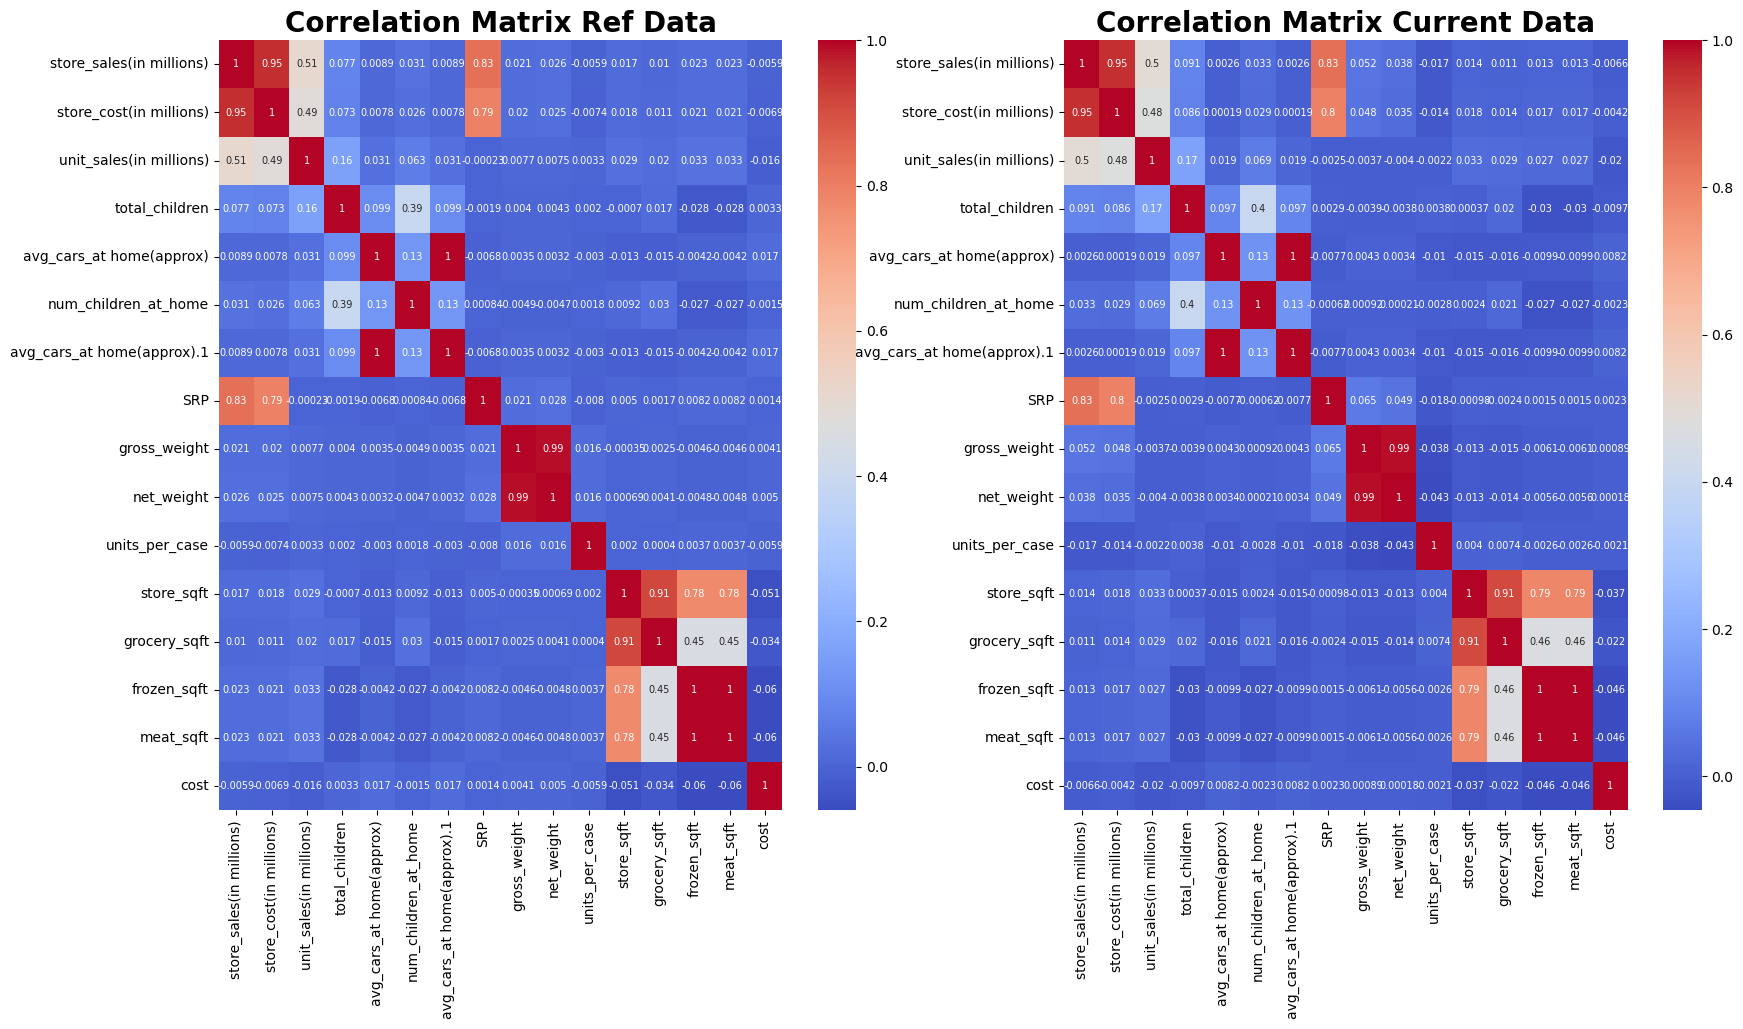

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 1x2 grid of subplots
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))

# Plot the first heatmap in the left subplot

sns.heatmap(df_ref_woOut[num_cols].corr(), annot = True, cmap = 'coolwarm', annot_kws = {'size' : 7}, ax=axs[0])
axs[0].set_title("Correlation Matrix Ref Data", fontsize=20, fontweight='bold')


# Plot the second heatmap in the right subplot
sns.heatmap(df_curr_woOut[num_cols].corr(), annot=True, cmap='coolwarm', annot_kws={'size': 7}, ax=axs[1])
axs[1].set_title("Correlation Matrix Current Data", fontsize=20, fontweight='bold')

# Show the plot
plt.show()


## Feature Engineering

### Interaction Terms

According to the correlation matrix, we will do feature engineering to preserve as much data as possible at this stage while not facing multicollinearity.

In [95]:
df_curr_woOut['sales_to_cost_ratio'] = df_curr_woOut['store_sales(in millions)'] / df_curr_woOut['store_cost(in millions)']
df_curr_woOut['frozen_to_meat_ratio'] = df_curr_woOut['frozen_sqft'] / df_curr_woOut['meat_sqft']
df_curr_woOut['meat_to_total_ratio'] = df_curr_woOut['meat_sqft'] / df_curr_woOut['store_sqft']

df_ref_woOut['sales_to_cost_ratio'] = df_ref_woOut['store_sales(in millions)'] / df_ref_woOut['store_cost(in millions)']
df_ref_woOut['frozen_to_meat_ratio'] = df_ref_woOut['frozen_sqft'] / df_ref_woOut['meat_sqft']
df_ref_woOut['meat_to_total_ratio'] = df_ref_woOut['meat_sqft'] / df_ref_woOut['store_sqft']

C:\Users\ximen\AppData\Local\Temp\ipykernel_6928\3052423727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curr_woOut['sales_to_cost_ratio'] = df_curr_woOut['store_sales(in millions)'] / df_curr_woOut['store_cost(in millions)']
C:\Users\ximen\AppData\Local\Temp\ipykernel_6928\3052423727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curr_woOut['frozen_to_meat_ratio'] = df_curr_woOut['frozen_sqft'] / df_curr_woOut['meat_sqft']
C:\Users\ximen\AppData\Local\Temp\ipykernel_6928\3052423727.py:3: 

In [96]:
df_curr_woOut = df_curr_woOut.drop(['store_sales(in millions)', 'store_cost(in millions)', 'frozen_sqft', 'meat_sqft', 'grocery_sqft', 'store_sqft',
                          'gross_weight', 'avg_cars_at home(approx).1', 'grocery_sqft'], axis = 1)

df_ref_woOut = df_ref_woOut.drop(['store_sales(in millions)', 'store_cost(in millions)', 'frozen_sqft', 'meat_sqft', 'grocery_sqft', 'store_sqft',
                          'gross_weight', 'avg_cars_at home(approx).1', 'grocery_sqft'], axis = 1)

In [97]:
num_cols, cate_cols, pre_dum_cols = [], [], []
for c in df_ref_woOut.columns:
    uni_len = len(set(df_ref_woOut[c]))
    dtype = df_ref_woOut[c].dtypes

    if dtype == object:
        cate_cols.append(c)
    else: # dtype == float
        if uni_len == 2:
            pre_dum_cols.append(c)
        elif uni_len < 10:
            num_cols.append(c)
            print("Number of unique values: %d \t Datatype: %s \t Column name: %s" %(uni_len, dtype, c))
        else:
            num_cols.append(c)


num_cols, cate_cols, pre_dum_cols = [], [], []
for c in df_curr_woOut.columns:
    uni_len = len(set(df_curr_woOut[c]))
    dtype = df_curr_woOut[c].dtypes

    if dtype == object:
        cate_cols.append(c)
    else: # dtype == float
        if uni_len == 2:
            pre_dum_cols.append(c)
        elif uni_len < 10:
            num_cols.append(c)
            print("Number of unique values: %d \t Datatype: %s \t Column name: %s" %(uni_len, dtype, c))
        else:
            num_cols.append(c)

Number of unique values: 6 	 Datatype: float64 	 Column name: unit_sales(in millions)
Number of unique values: 6 	 Datatype: float64 	 Column name: total_children
Number of unique values: 5 	 Datatype: float64 	 Column name: avg_cars_at home(approx)
Number of unique values: 6 	 Datatype: float64 	 Column name: num_children_at_home
Number of unique values: 6 	 Datatype: float64 	 Column name: unit_sales(in millions)
Number of unique values: 6 	 Datatype: float64 	 Column name: total_children
Number of unique values: 5 	 Datatype: float64 	 Column name: avg_cars_at home(approx)
Number of unique values: 6 	 Datatype: float64 	 Column name: num_children_at_home


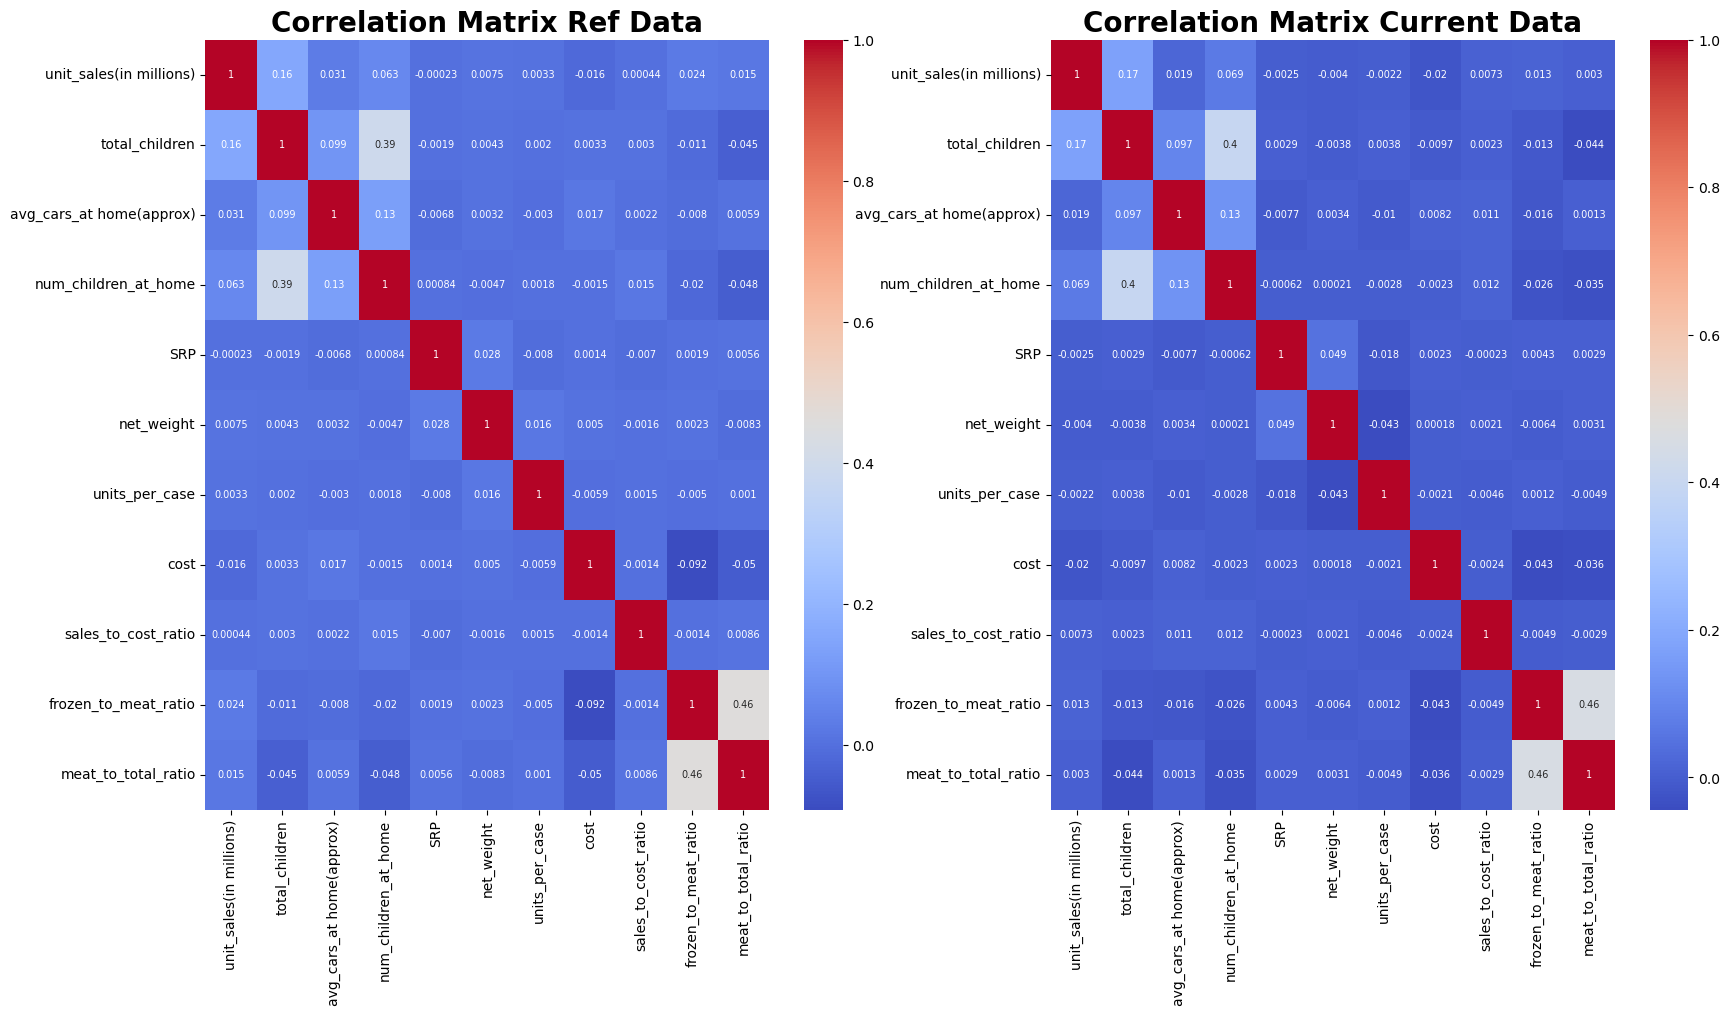

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 1x2 grid of subplots
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))

# Plot the first heatmap in the left subplot

sns.heatmap(df_ref_woOut[num_cols].corr(), annot = True, cmap = 'coolwarm', annot_kws = {'size' : 7}, ax=axs[0])
axs[0].set_title("Correlation Matrix Ref Data", fontsize=20, fontweight='bold')


# Plot the second heatmap in the right subplot
sns.heatmap(df_curr_woOut[num_cols].corr(), annot=True, cmap='coolwarm', annot_kws={'size': 7}, ax=axs[1])
axs[1].set_title("Correlation Matrix Current Data", fontsize=20, fontweight='bold')

# Show the plot
plt.show()


### Dropping irrelevant attributes

We will drop irrelevant attributes or attributes that have too many variables to avoid over-complicating our model.

In [99]:
df_ref = df_ref_woOut.drop(['food_category', 'food_department', 'brand_name', 'store_city', 'promotion_name'], axis = 1)

df_curr = df_curr_woOut.drop(['food_category', 'food_department', 'brand_name', 'store_city', 'promotion_name'], axis = 1)

### Dummifying categorical variables

Since 'media_type' will be our treatment for the causal inference, we encode it differently not to add too many features/predictors to our model.

In [100]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit_transform(df_ref['media_type'].tolist())

# to decode values 
# label_encoder.inverse_transform([1, 1, 0])

df_ref['media_type_labeled'] = label_encoder.fit_transform(df_ref['media_type'].tolist())


label_encoder.fit_transform(df_curr['media_type'].tolist())

# to decode values 
# label_encoder.inverse_transform([1, 1, 0])

df_curr['media_type_labeled'] = label_encoder.fit_transform(df_curr['media_type'].tolist())

In [101]:
# Dummify categorical variables except for 'media type'
df_ref = pd.get_dummies(df_ref[[c for c in df_ref.columns if c != 'media_type']], drop_first = True)

df_curr = pd.get_dummies(df_curr[[c for c in df_curr.columns if c != 'media_type']], drop_first = True)

### Statistical Properties of both Datasets

Difference in Statistical Properties Between Baseline and Current Data:
       unit_sales(in millions)  total_children  avg_cars_at home(approx)  \
count                 0.000000        0.000000                  0.000000   
mean                  0.001356       -0.006328                  0.008102   
std                  -0.000254       -0.010919                  0.002027   
min                   0.000000        0.000000                  0.000000   
25%                   0.000000        0.000000                  0.000000   
50%                   0.000000        0.000000                  0.000000   
75%                   0.000000        0.000000                  0.000000   
max                   0.000000        0.000000                  0.000000   

       num_children_at_home       SRP  net_weight  recyclable_package  \
count              0.000000  0.000000    0.000000            0.000000   
mean               0.008623 -0.017191   -0.292276           -0.032789   
std                0.003

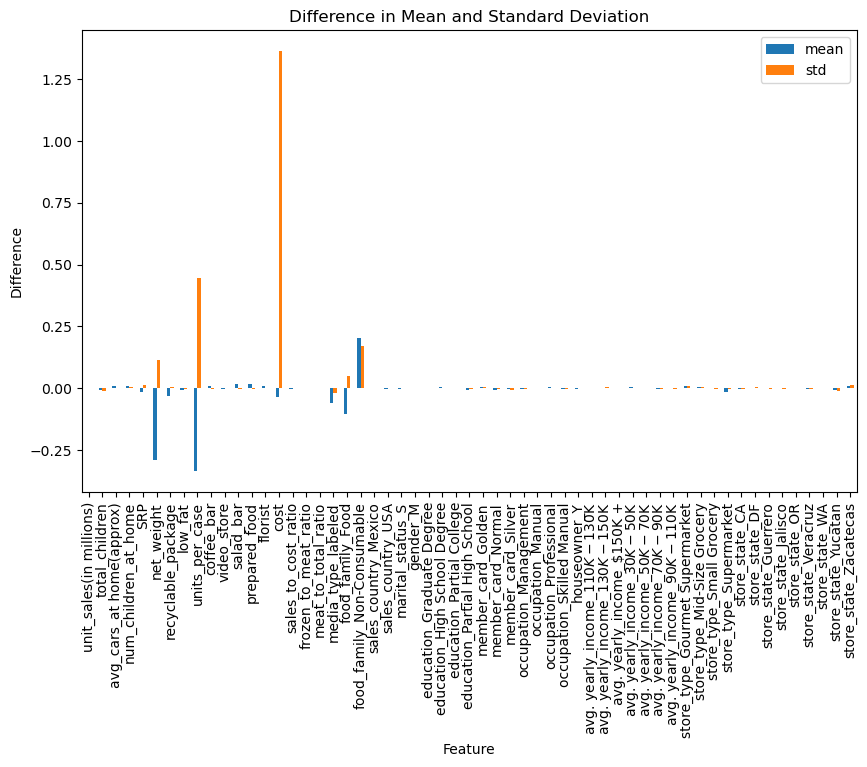

In [102]:
import pandas as pd

# Calculate the statistical properties of the baseline dataset
baseline_stats = df_ref.describe()

# Monitor changes in these properties over time
current_stats = df_curr.describe()

# Calculate the difference between baseline and current statistics
diff_stats = current_stats.subtract(baseline_stats)

# Print the difference between the baseline and current statistics
print("Difference in Statistical Properties Between Baseline and Current Data:")
print(diff_stats)

# Transpose the diff_stats dataframe
diff_stats = diff_stats.T

# Plot the difference in mean and standard deviation
diff_stats[['mean', 'std']].plot(kind='bar', figsize=(10, 6))
plt.title('Difference in Mean and Standard Deviation')
plt.xlabel('Feature')
plt.ylabel('Difference')
plt.show()



## Data Drift

### Kullback-Leibler (KL) Divergence

Data drift refers to the phenomenon where the statistical properties of the data change over time, which can have negative consequences for machine learning models that rely on these properties to make predictions. By monitoring the KL divergence, we can detect when the distribution of the "cost" variable in the current dataset differs significantly from the distribution in the reference dataset, which may indicate that data drift has occurred.

Monitoring the KL divergence of the target variable can therefore help us ensure the ongoing accuracy and reliability of our machine learning models.

In [103]:
import numpy as np
from scipy.stats import entropy

# Extract the "cost" column from the dataframes
col_curr = df_curr["cost"].to_numpy()
col_ref = df_ref["cost"].to_numpy()

# Compute the probability distributions
pdf_curr, _ = np.histogram(col_curr, density=True)
pdf_ref, _ = np.histogram(col_ref, density=True)

# Compute the KL divergence
kl_div = entropy(pdf_curr, pdf_ref)

# Define a threshold for the KL divergence
threshold = 0.1

# Compare the KL divergence with the threshold
if kl_div > threshold:
    print("Data drift detected! KL divergence = {:.4f}".format(kl_div))
else:
    print("No data drift detected. KL divergence = {:.4f}".format(kl_div))


No data drift detected. KL divergence = 0.0030


### Jensen-Shannon (JS) Divergence

Jensen-Shannon Divergence (JS divergence) is a measure of similarity between two probability distributions. It's calculated as the average of the Kullback-Leibler divergences between the two distributions and their average. The resulting value ranges from 0 to 1, with 0 indicating that the two distributions are identical and 1 indicating that the two distributions are completely dissimilar. 

In the results of the JS Divergence we can see that cost was a value of .075 which suggests that there is some degree of difference between the two probability distributions being compared, but the difference is not large. It suggests that the two distributions are relatively similar, but they are not identical.

Some other features such as store_state_Jalisco or average yearly income have a JS Divergence of ~0.58 which indicates that the two probability distributions being compared are quite different and have a relatively low degree of overlap. 

In [104]:
import pandas as pd
from scipy.spatial.distance import jensenshannon

js_distance = jensenshannon(
    pd.concat([df_ref, df_curr], axis=0).mean(axis=0),  # Combined mean distribution
    [df_ref.mean(axis=0), df_curr.mean(axis=0)]        # List of the two individual mean distributions
)


df_js = pd.DataFrame({'Feature': df_ref.columns, 'JS Distance': js_distance})
df_js = df_js.sort_values('JS Distance', ascending=False)

print(df_js)



                             Feature  JS Distance
51               store_state_Jalisco     0.588331
39        avg. yearly_income_$150K +     0.587810
49                    store_state_DF     0.587706
50              store_state_Guerrero     0.587579
46          store_type_Small Grocery     0.587316
37  avg. yearly_income_$110K - $130K     0.586950
53              store_state_Veracruz     0.586885
43   avg. yearly_income_$90K - $110K     0.586849
45       store_type_Mid-Size Grocery     0.586830
25         education_Graduate Degree     0.586626
38  avg. yearly_income_$130K - $150K     0.586448
55               store_state_Yucatan     0.585808
31                member_card_Silver     0.585482
27         education_Partial College     0.585425
44    store_type_Gourmet Supermarket     0.584815
56             store_state_Zacatecas     0.584562
29                member_card_Golden     0.584253
42    avg. yearly_income_$70K - $90K     0.584243
17               meat_to_total_ratio     0.584223


### Kolmogorov-Smirnov (KS) Test

The Kolmogorov-Smirnov (KS) test is a statistical test used to compare two probability distributions. It determines if two samples of data are drawn from the same distribution, or if they differ significantly. To interpret the results of a KS test, we compare the calculated test statistic with the critical value from the KS table for the chosen significance level. If the calculated statistic is greater than the critical value, we reject the null hypothesis and conclude that the two samples are drawn from different distributions. If the calculated statistic is smaller than the critical value, we fail to reject the null hypothesis, and conclude that there is no significant difference between the two samples.

The resulting filtered_df dataframe shows the columns that have significantly different distributions between df_ref and df_curr, along with their corresponding p-values.

In [105]:
import pandas as pd
from scipy.stats import ks_2samp

# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['column', 'pvalue'])

# Iterate over the columns of the dataframes and apply the KS test
for column in df_ref.columns:
    ref_data = df_ref[column]
    curr_data = df_curr[column]
    _, pvalue = ks_2samp(ref_data, curr_data)
    results_df = results_df.append({'column': column, 'pvalue': pvalue}, ignore_index=True)

# Filter the columns with a low p-value (less than 0.05)
filtered_df = results_df[results_df['pvalue'] < 0.05]

print(filtered_df)


C:\Users\ximen\AppData\Local\Temp\ipykernel_6928\1321622087.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'column': column, 'pvalue': pvalue}, ignore_index=True)
C:\Users\ximen\AppData\Local\Temp\ipykernel_6928\1321622087.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'column': column, 'pvalue': pvalue}, ignore_index=True)
C:\Users\ximen\AppData\Local\Temp\ipykernel_6928\1321622087.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'column': column, 'pvalue': pvalue}, ignore_index=True)
C:\Users\ximen\AppData\Local\Temp\ipykernel_6928\1321622087.py:12: FutureWarning: The frame.append method is deprecated and will b

                        column         pvalue
4                          SRP   4.883566e-14
5                   net_weight   7.652592e-25
6           recyclable_package   7.249363e-14
8               units_per_case   2.596569e-17
11                   salad_bar   2.919896e-03
12               prepared_food   2.919896e-03
14                        cost   3.342157e-09
19            food_family_Food  4.647808e-138
20  food_family_Non-Consumable   0.000000e+00
47      store_type_Supermarket   4.050526e-03


C:\Users\ximen\AppData\Local\Temp\ipykernel_6928\1321622087.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'column': column, 'pvalue': pvalue}, ignore_index=True)
C:\Users\ximen\AppData\Local\Temp\ipykernel_6928\1321622087.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'column': column, 'pvalue': pvalue}, ignore_index=True)
C:\Users\ximen\AppData\Local\Temp\ipykernel_6928\1321622087.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'column': column, 'pvalue': pvalue}, ignore_index=True)
C:\Users\ximen\AppData\Local\Temp\ipykernel_6928\1321622087.py:12: FutureWarning: The frame.append method is deprecated and will b